# Аналитика в авиакомпании

Российская авиакомпании F9, которая выполняет внутренние пассажирские перевозки, решила выяснить предпочтения пользователей, покупающих билеты на разные направления, для развития компании.

Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

## Изучение данных из файла

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import warnings 
from scipy import stats as st
warnings.filterwarnings('ignore')

df_aircraft_info = pd.read_csv('/datasets/query_1.csv')
display(df_aircraft_info)
df_city_info = pd.read_csv('/datasets/query_3.csv')
display(df_city_info)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


Полученные две таблицы содержат информацию о моделях самолетов и количествах перелетов, а также информацию о городах России и среднем количестве прилетов туда. 

Удостоверимся, что таблицы содержат корректные типы данных, и пропуски в них отсутствуют. 

In [2]:
df_aircraft_info.info()
print('')
df_city_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Результат метода *info()* подтвердил, что проблем в данных нет. 

Проверим вторую таблицу на наличие дубликатов:

In [3]:
df_city_info.duplicated().sum()

0

Таблицы дубликатов не содержат. 

**Вывод:**

Полученные данные полностью соответствуют необходимым требованиям, а значит их в полной мере можно использовать для анализа

## Исследовательский анализ данных

### Поиск топ-10 городов по количеству рейсов
Так как среднее количество в день вычисляется путем деления всего количесвта рейсов на количество дней, то мы можем сформировать этот топ по среднему количеству рейсов.

In [4]:
df_top10_cities = df_city_info.sort_values(by='average_flights', ascending=False).head(10)
display(df_top10_cities)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Из полученной таблицы видно, что наибольшее количество рейсов совершается в Москву и Санкт-Петербург

### график: модели самолетов и количество рейсов

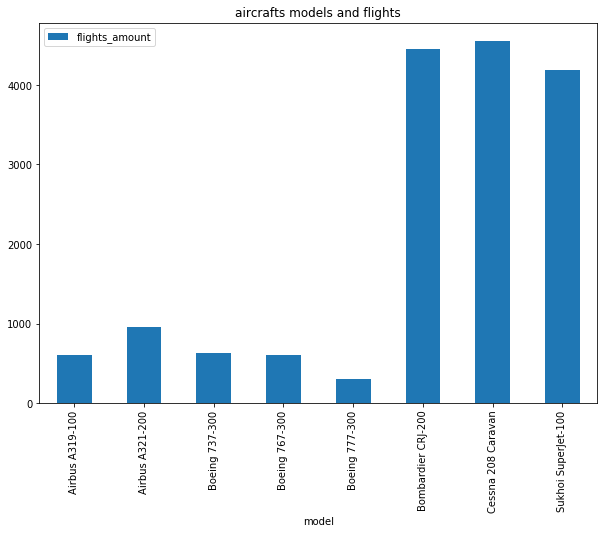

In [5]:
df_aircraft_info = df_aircraft_info.set_index('model')
df_aircraft_info.plot(y='flights_amount', kind='bar', figsize=(10,7))
plt.title('aircrafts models and flights')
plt.show()

**Вывод по графику:**

Наибольшей популярностью пользуются модели *Bombardier CRJ-200*, *Cessna 208 Caravan* и *Sukhoi SuperJet-100*, скорее всего это связано с тем, что компании, которая производит только внутренние перевозки, нет надобности эксплуатировать большие самолеты *Airbus* и *Boeing*, ведь пассажиропоток между регионами скорее всего сильно ниже. 

###  график: города и количество рейсов

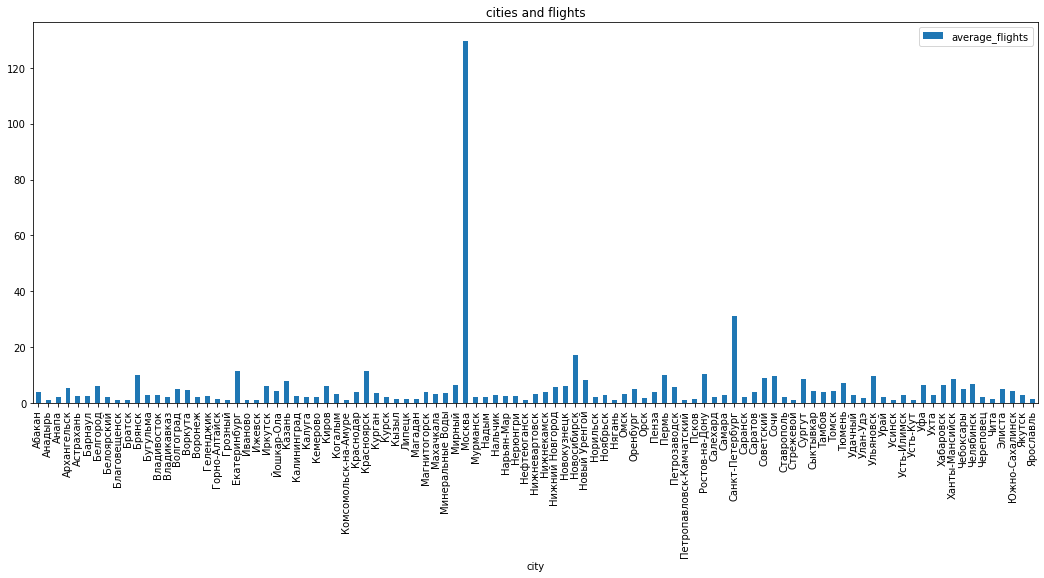

In [6]:
df_city_info = df_city_info.set_index('city')
df_city_info.plot(y='average_flights', kind='bar', figsize=(18,7))
plt.title('cities and flights')
plt.show()

**Вывод по графику:**

График четко визуализирует топ, полученный ранее. А именно: наибольшее количество рейсов приходится на Санкт-Петербург и Москву

### график: топ-10 городов и количество рейсов

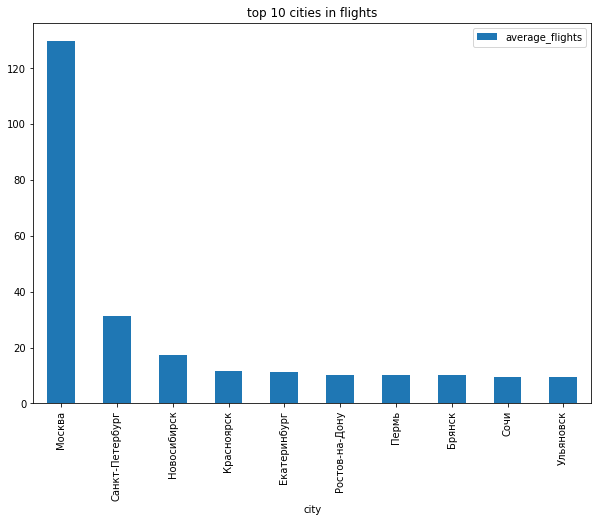

In [7]:
df_top10_cities = df_top10_cities.set_index('city')
df_top10_cities.plot(y='average_flights', kind='bar', figsize=(10,7))
plt.title('top 10 cities in flights')
plt.show()

**Вывод по графику:**

Очевидно, что этот топ возглавляют Москва и Питер, потому что, во-первых, в этих городах наибольшее количество жителей, следовательно и рейсов больше, а, во-вторых, мероприятний здесь проводится больше, значит и люди сюда приезжают чаще. Новосибирск является третитьем по численности населения городом в России, поэтому его позиция в топе тоже весьма очевидна. Екатеринбург, как столица зауралья, притягивает к себе всю азиатскую часть России и является крупным производительным центром. Сочи - курортная зона, поэтому люди сюда и приезжают в таком количестве.   

## Общий вывод
Полученная закономерность распределения легко объяснима, основными причинами выбора направления путешествия являются: местоположение города, его размер и численность населения, а также концентрация производств в регионе. 